# Анализ ценовой динамики (Core Metric)

Что смотреть:

- Средняя цена за м² по районам/типам жилья.

- Распределение цен (гистограммы, box-plot для выбросов).

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data.csv')

df.head()

,author_type,url,location,deal_type,accommodation_type,price,year_of_construction,house_material_type,living_meters,floors_count,underground,creation_date,price_per_m2,underground_list,month,year_month,year,day_of_week
0,realtor_based,https://www.cian.ru/rent/flat/319524074/,Москва,rent_long,flat,290300.0,NaN,monolithBrick,60.1,28,"Багратионовская, Парк Победы, Филёвский парк",2025-07-08,4830.282862,"['Багратионовская', 'Парк Победы', 'Филёвский ...",7,2025-07,2025,1
1,realtor_based,https://www.cian.ru/rent/flat/313850443/,Москва,rent_long,flat,200600.0,2005.0,panel,53.3,22,"Поклонная, Ломоносовский проспект, Киевская",2025-02-18,3763.602251,"['Поклонная', 'Ломоносовский проспект', 'Киевс...",2,2025-02,2025,1
2,realtor_based,https://www.cian.ru/rent/flat/317523322/,Москва,rent_long,flat,84300.0,1960.0,panel,25.0,5,"Ломоносовский проспект, Минская, Минская",2025-05-14,3372.000000,"['Ломоносовский проспект', 'Минская', 'Минская']",5,2025-05,2025,2
3,realtor_based,https://www.cian.ru/rent/flat/316058969/,Москва,rent_long,flat,79800.0,2024.0,panel,18.0,24,"Бульвар Генерала Карбышева, Серебряный Бор, Щу...",2025-04-09,4433.333333,"['Бульвар Генерала Карбышева', 'Серебряный Бор...",4,2025-04,2025,2
4,realtor_based,https://www.cian.ru/rent/flat/319463100/,Москва,rent_long,flat,95200.0,2022.0,monolith,18.0,25,"Октябрьское поле, Бульвар Генерала Карбышева, ...",2025-07-05,5288.888889,"['Октябрьское поле', 'Бульвар Генерала Карбыше...",7,2025-07,2025,5


## Средняя цена за м² по метро


Топ-10 станций с количеством объявлений и средней ценой:
               count  avg_price_per_m2
Москва-Сити      308               NaN
Деловой центр    273               NaN
Шелепиха         237               NaN
Белорусская       84               NaN
Аминьевская       75               NaN
Тверская          64               NaN
Пушкинская        64               NaN
Маяковская        60               NaN
Чеховская         59               NaN
Курская           59               NaN


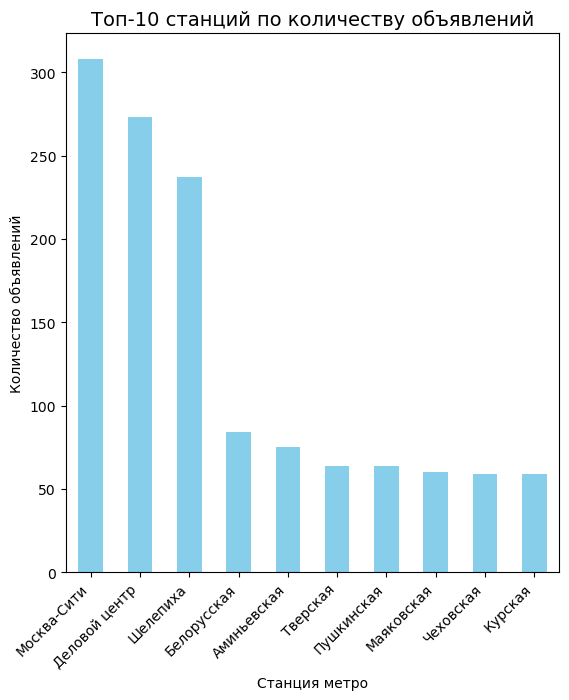

In [12]:

from collections import Counter

# 1. Подготовка данных
df['price_per_m2'] = df['price'] / df['living_meters']  # Добавляем цену за м²

# 2. Разделяем станции метро и считаем частоту
all_districts = []
for districts in df['underground'].dropna():
    separated = [d.strip() for d in districts.split(',')]
    all_districts.extend(separated)

district_counts = Counter(all_districts)

# 3. Создаем DataFrame с количеством объявлений
top_districts = pd.DataFrame.from_dict(district_counts, orient='index', columns=['count'])
top_districts = top_districts.sort_values('count', ascending=False)

# 4. Добавляем среднюю цену за м²
avg_price = df.groupby('underground_list')['price_per_m2'].mean()
top_districts['avg_price_per_m2'] = avg_price

# 5. Визуализация (Топ-10 по количеству объявлений)
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
top_districts.head(10)['count'].plot(kind='bar', color='skyblue')
plt.title('Топ-10 станций по количеству объявлений', fontsize=14)
plt.xlabel('Станция метро')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=45, ha='right')


result_table = top_districts.head(10).copy()
result_table['avg_price_per_m2'] = result_table['avg_price_per_m2'].round(2)
print("\nТоп-10 станций с количеством объявлений и средней ценой:")
print(result_table[['count', 'avg_price_per_m2']])